## Estadisticos

In [1]:
#Leemos el archivo limpio que se realizo en la tarea 2
import pandas as pd

df_dolar = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\Tarea 2\df_dolar.xlsx')

### Medidas de tendencia central y dispersión

In [2]:
##############################
#Medidas de tendencia central#
##############################

#Media
def media(valor):
    return sum(valor) / len(valor)

#Mediana
def mediana(valor):
    datos_ordenados = sorted(valor)
    n = len(valor)
    if n % 2 == 0:
        return (datos_ordenados[n // 2 - 1] + datos_ordenados[n // 2]) / 2
    else:
        return datos_ordenados[n // 2]

#Moda
def moda(valor):
    frecuencias = valor.value_counts()
    return frecuencias[frecuencias == frecuencias.max()].index

#######################
#Medidas de dispersión#
#######################

#varianza
def varianza(valor):
    m = media(valor)
    n = len(valor)
    suma_cuadrados = sum((x - media) ** 2 for x in valor)
    return suma_cuadrados / n

#Desviacion estandar
def desviacion_estandar(valor):
    return varianza(valor) ** 0.5

#Rango
def rango(valor):
    return valor.max() - valor.min()

#Cuantil
def cuantil(valor, p):
    datos_ordenados = sorted(valor)
    n = len(valor)

    posicion_cuantil = (n - 1) * p

    inferior = int(posicion_cuantil // 1)
    superior = int(inferior + 1)

    #interpolación lineal
    cuantil = datos_ordenados[inferior] + (posicion_cuantil % 1) * (datos_ordenados[superior] - datos_ordenados[inferior])

    return cuantil

### Estadísticos descriptivos básicos

In [3]:
df_dolar.describe()

,Precio_Inicio,Precio_Maximo,Precio_Minimo,Precio_Final
count,522.000000,522.000000,522.000000,522.000000
mean,19.340600,19.437036,19.258520,19.340627
std,1.313428,1.323681,1.305014,1.313353
min,16.680901,16.747841,16.615801,16.680901
25%,18.146963,18.219875,18.068024,18.146963
50%,19.862850,19.944440,19.798750,19.862850
75%,20.374200,20.469590,20.290428,20.374200
max,21.728901,22.149981,21.671700,21.729601


### Matriz de correlación

In [4]:
#Matriz de correlacion
matriz_correlacion = df_dolar.corr()
matriz_correlacion

,Precio_Inicio,Precio_Maximo,Precio_Minimo,Precio_Final
Precio_Inicio,1.000000,0.997629,0.998875,0.999995
Precio_Maximo,0.997629,1.000000,0.997915,0.997619
Precio_Minimo,0.998875,0.997915,1.000000,0.998874
Precio_Final,0.999995,0.997619,0.998874,1.000000


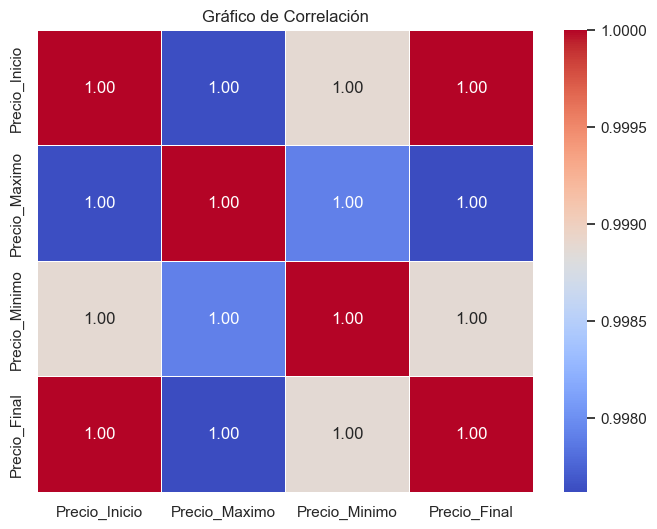

In [5]:
#Grafico de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")  # Configuración de estilo
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Gráfico de Correlación")
plt.show()

Es razonable que todas las variables mostrarán una correlación cercana a 1, dado que todas ellas representan el precio del dólar en diferentes momentos del día. Con base en esta observación. Considero valioso incorporar indicadores económicos clave, tales como el Producto Interno Bruto (PIB), el Índice de Desempleo y el Índice de Precios al Consumidor (IPC) ya quetienen el potencial de fortalecer la precisión de las predicciones sobre el comportamiento futuro del precio del dólar.

### Prueba de hipótesis

#### Para esta prueba se utilizara la variable Precio Final

In [8]:
#Prueba de normalidad para saber si el precio final sigue una distribucion normal
from scipy import stats
import numpy as np

# Realiza la prueba de Shapiro-Wilk
stat, p_valor = stats.shapiro(df_dolar["Precio_Final"].values)

# Establece un nivel de significancia (por ejemplo, 0.05)
nivel_significancia = 0.05

# Imprime los resultados
print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_valor}')

# Compara el valor p con el nivel de significancia
if p_valor > nivel_significancia:
    print('No se puede rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de prueba: 0.9008416533470154
Valor p: 6.6739748370764016e-18
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


### Presenta tus resultados gráficamente

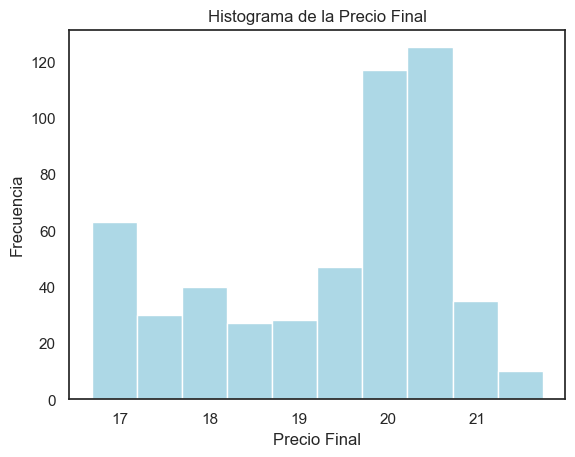

In [12]:
#Histograma de precio final del dolar
plt.figure(figsize=(6.4, 4.8))
plt.hist(df_dolar["Precio_Final"].values, color="lightblue")

plt.title("Histograma de la Precio Final")
plt.xlabel("Precio Final")
plt.ylabel("Frecuencia")
plt.show()